In [1]:
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Tools
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# Standard Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Functions

# Display score
def display_score(scores):
    print('Scores: ', scores)
    print('Mean: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))

# Do grid seach
def grid(model, X, y, parameters, scoring = 'precision', cv=1, verbose = 0):
    clf = GridSearchCV(model, parameters, scoring = scoring, cv = cv, verbose = verbose)
    clf.fit(X, y)
    pred = clf.predict(X)
    return clf, pred

# Print metrics
def score(y, y_pred):
    print('---------------------------------------------------------')
    print('f1_score: ', f1_score(y, y_pred))
    print('accuracy_score: ', accuracy_score(y, y_pred))
    print('precision_score: ', precision_score(y, y_pred))
    print('recall_score: ', recall_score(y, y_pred))
    print('---------------------------------------------------------')

In [3]:
# Import data and get dummies
df = pd.read_csv('cleaned-healthcare-dataset-stroke-data.csv')

# Split data in training- and test-data
train, test = train_test_split(df, test_size=0.2, train_size=0.8, random_state=0)

# Create and print correlation matrix
corr_matrix = train.corr()
print(corr_matrix['stroke'].sort_values(ascending=False))

stroke               1.000000
age                  0.232741
avg_glucose_level    0.144583
hypertension         0.143422
heart_disease        0.134304
bmi                  0.042258
id                  -0.003186
Unnamed: 0          -0.350579
Name: stroke, dtype: float64


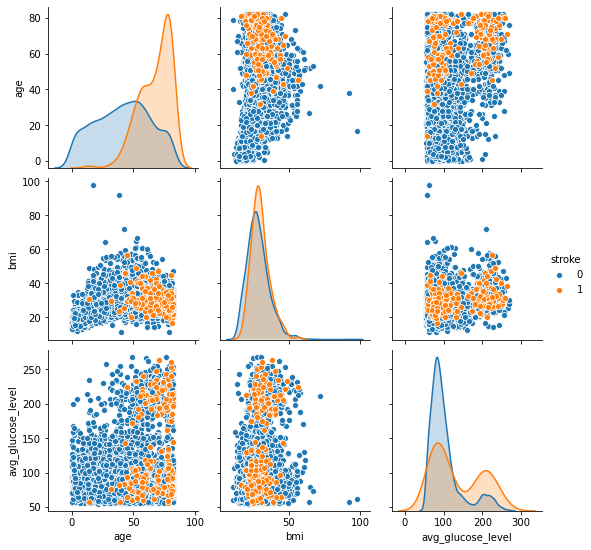

In [4]:
# Pair plot
sns.pairplot(train, hue = 'stroke', vars=['age','bmi','avg_glucose_level'])
plt.show()

In [5]:
# Define numerical and categorical coloumns
num_col = ['age','avg_glucose_level','hypertension','heart_disease','bmi','id']
cat_col = ['gender','work_type','Residence_type','smoking_status']

# Create numerical pipeline
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

# Create full pipeline
full_pipeline = ColumnTransformer([
    ('num_transform', num_pipeline, num_col),
    ('cat_transform', OneHotEncoder(), cat_col)
])

# Transform training data
X_train = train.drop(columns = ['stroke'])
y_train = train['stroke']
full_pipeline.fit(X_train)
X_train_transformed = full_pipeline.transform(X_train)

y_train.value_counts()

0    3761
1     166
Name: stroke, dtype: int64

In [6]:
# Create Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators = 10, max_depth = 50, random_state = 0)
clf_rf.fit(X_train_transformed, y_train)

# Create Decision Tree Classifier
clf_dt = DecisionTreeClassifier(max_depth = 20, random_state = 0)
clf_dt.fit(X_train_transformed, y_train)

# Create Support Vector Machine Classifier
clf_svm = SVC(kernel = "linear", gamma = 0.1, C = 1)
clf_svm.fit(X_train_transformed, y_train)

print('Training done!')

Training done!


In [7]:
# Calculate scores
clf_rf_preds = cross_val_predict(clf_rf, X_train_transformed, y_train, cv = 3)
print('Random Forest Classifier')
print('---------------------------------------------------------')
print(f1_score(y_train, clf_rf_preds))
print('---------------------------------------------------------')

clf_dt_preds = cross_val_predict(clf_dt, X_train_transformed, y_train, cv = 3)
print('\n\n Decision Tree Classifier')
print('---------------------------------------------------------')
print(f1_score(y_train, clf_dt_preds))
print('---------------------------------------------------------')

clf_svm_preds = cross_val_predict(clf_svm, X_train_transformed, y_train, cv = 3)
print('\n\n Support Vector Machine Classifier')
print('---------------------------------------------------------')
print(f1_score(y_train, clf_svm_preds))
print('---------------------------------------------------------')

Random Forest Classifier
---------------------------------------------------------
0.043243243243243246
---------------------------------------------------------


 Decision Tree Classifier
---------------------------------------------------------
0.0881542699724518
---------------------------------------------------------


 Support Vector Machine Classifier
---------------------------------------------------------
0.0
---------------------------------------------------------


In [8]:
# Create parameters and lists
parameter1 = {'n_estimators': range(1,8), 'max_depth': range(15,25), 'max_features': range(1,8)}
parameter2 = {'max_depth': range(15,25), 'max_features': range(1,8)}
parameter3 = {'C': range(1,10), 'gamma': range(1,3), 'kernel': ('linear', 'rbf')}
parameters = [parameter1, parameter2, parameter3]

clfs = [clf_rf, clf_dt, clf_svm]
preds = []
clfs_after = []

# Use grid search
for i in range(3):
    clf, pred = grid(clfs[i], X_train_transformed, y_train, parameters[i], scoring = 'f1', cv = 3, verbose = 0)
    preds.append(pred)
    clfs_after.append(clf)

In [9]:
# Print scores
print('Random Forest Classifier after grid_search')
score(y_train, preds[0])
print('\n Decision Tree Classifier after grid_search')
score(y_train, preds[1])
print('\n Support Vector Machine Classifier after grid_search')
score(y_train, preds[2])

Random Forest Classifier after grid_search
---------------------------------------------------------
f1_score:  0.6588921282798834
accuracy_score:  0.9702062643239114
precision_score:  0.6384180790960452
recall_score:  0.6807228915662651
---------------------------------------------------------

 Decision Tree Classifier after grid_search
---------------------------------------------------------
f1_score:  0.9969788519637462
accuracy_score:  0.9997453526865292
precision_score:  1.0
recall_score:  0.9939759036144579
---------------------------------------------------------

 Support Vector Machine Classifier after grid_search
---------------------------------------------------------
f1_score:  0.9150326797385622
accuracy_score:  0.993379169849758
precision_score:  1.0
recall_score:  0.8433734939759037
---------------------------------------------------------


In [10]:
# Calculate scores after grid search
clf_rf_preds2 = cross_val_predict(clfs_after[0], X_train_transformed, y_train, cv = 3)
print('Random Forest Classifier')
print('---------------------------------------------------------')
print(f1_score(y_train, clf_rf_preds2))
print('---------------------------------------------------------')

clf_dt_preds2 = cross_val_predict(clfs_after[1], X_train_transformed, y_train, cv = 3)
print('\n\n Decision Tree Classifier')
print('---------------------------------------------------------')
print(f1_score(y_train, clf_dt_preds2))
print('---------------------------------------------------------')

clf_svm_preds2 = cross_val_predict(clfs_after[2], X_train_transformed, y_train, cv = 3)
print('\n\n Support Vector Machine Classifier')
print('---------------------------------------------------------')
print(f1_score(y_train, clf_svm_preds2))
print('---------------------------------------------------------')

Random Forest Classifier
---------------------------------------------------------
0.14057507987220447
---------------------------------------------------------


 Decision Tree Classifier
---------------------------------------------------------
0.07894736842105263
---------------------------------------------------------


 Support Vector Machine Classifier
---------------------------------------------------------
0.0106951871657754
---------------------------------------------------------
